In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [109]:
game_df = pd.read_csv('game.csv')
game_info_df = pd.read_csv('game_info.csv')
team_df = pd.read_csv('team.csv')
team_details_df = pd.read_csv('team_details.csv')

In [127]:
merged_df = pd.merge(game_df, game_info_df, on='game_id')
# Group the dataframe by 'team_id'
grouped = merged_df.groupby(['team_id_home'])
merged_df['game_date_x'] = pd.to_datetime(merged_df['game_date_x'])

# Calculate the time differences in days for the 'game_date_x' column
time_diff = grouped['game_date_x'].diff().dt.days
merged_df['days_off_home'] = time_diff.fillna(0)

# Group the dataframe by 'team_id'
grouped = merged_df.groupby(['team_id_away'])
merged_df['game_date_x'] = pd.to_datetime(merged_df['game_date_x'])

# Calculate the time differences in days for the 'game_date_x' column
time_diff = grouped['game_date_x'].diff().dt.days
merged_df['days_off_away'] = time_diff.fillna(0)

In [128]:
merged_df = pd.merge(merged_df, team_details_df, left_on='team_id_home', right_on='team_id')
merged_df['attend_density'] = merged_df['attendance'] / merged_df['arenacapacity']

In [129]:
merged_df = merged_df[merged_df['season_id'] >= 22001]
merged_df = merged_df[['days_off_home', 'days_off_away', 'attend_density', 'game_id']]
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24427 entries, 2030 to 59741
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   days_off_home   24427 non-null  float64
 1   days_off_away   24427 non-null  float64
 2   attend_density  23728 non-null  float64
 3   game_id         24427 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 954.2 KB


In [133]:
game_merge_data = pd.read_csv('game_merged_data.csv')
game_merge_data = pd.merge(game_info_df, game_merge_data, on='game_id', how='left')
game_merge_data.drop('game_date_y', axis=1, inplace=True)
game_merge_data.rename(columns={'game_date_x': 'game_date'}, inplace=True)
game_merge_data = game_merge_data[game_merge_data['season_id'] >= 22001]
game_merge_data.drop('id_home', axis=1, inplace=True)
game_merge_data.drop('id_away', axis=1, inplace=True)
game_merge_data = game_merge_data.merge(team_details_df.add_suffix('_home'), left_on='team_id_home', right_on='team_id_home', suffixes=('', '_home'))
game_merge_data = game_merge_data.merge(team_details_df.add_suffix('_away'), left_on='team_id_away', right_on='team_id_away', suffixes=('', '_away'))
game_merge_data['season_id'] = game_merge_data['season_id'].astype(int)

# 使用 str.replace 方法将列名中的 "_home_home" 替换成 "_home"
game_merge_data.columns = game_merge_data.columns.str.replace('_home_home', '_home')

# 使用 drop 方法删除重复列名
game_merge_data = game_merge_data.loc[:, ~game_merge_data.columns.duplicated()]

game_merge_data.drop(game_merge_data.filter(regex='Unnamed').columns, axis=1, inplace=True)
game_merge_data = merged_df.merge(game_merge_data, on='game_id')
game_merge_data.head()

,days_off_home,days_off_away,attend_density,game_id,game_date,attendance,game_time,season_id,team_id_home,team_abbreviation_home,...,city_away_away,arena_away,arenacapacity_away,owner_away,generalmanager_away,headcoach_away,dleagueaffiliation_away,facebook_away,instagram_away,twitter_away
0,2.0,198.0,0.771102,20100028,2001-11-02 00:00:00,14361.0,2:01,22001,1.610613e+09,BOS,...,Chicago,United Center,21711,Jerry Reinsdorf,Arturas Karnisovas,Billy Donovan,Windy City Bulls,https://www.facebook.com/chicagobulls,https://instagram.com/chicagobulls,https://twitter.com/chicagobulls
1,5.0,3.0,1.000000,20100063,2001-11-07 00:00:00,18624.0,2:21,22001,1.610613e+09,BOS,...,Washington,Capital One Arena,20647,Ted Leonsis,Tommy Sheppard,Wes Unseld,Capital City Go-Go,https://www.facebook.com/Wizards,https://instagram.com/washwizards,https://twitter.com/WashWizards
2,5.0,8.0,0.756067,20100108,2001-11-14 00:00:00,14081.0,2:08,22001,1.610613e+09,BOS,...,Indiana,Gainbridge Fieldhouse,18345,Herb Simon,Kevin Pritchard,Rick Carlisle,Fort Wayne Mad Ants,https://www.facebook.com/pacers,https://instagram.com/pacers,https://twitter.com/Pacers
3,7.0,1.0,0.724871,20100154,2001-11-21 00:00:00,13500.0,2:08,22001,1.610613e+09,BOS,...,Atlanta,State Farm Arena,18729,Tony Ressler,Travis Schlenk,Quin Snyder,College Park Skyhawks,https://www.facebook.com/hawks,https://instagram.com/atlhawks,https://twitter.com/ATLHawks
4,2.0,5.0,1.000000,20100169,2001-11-23 00:00:00,18624.0,2:11,22001,1.610613e+09,BOS,...,Toronto,Scotiabank Arena,19800,Maple Leaf Sports and Entertainment,Masai Ujiri,Nick Nurse,Raptors 905,https://www.facebook.com/TorontoRaptors,https://instagram.com/raptors,https://twitter.com/Raptors


In [134]:
final_merged_data = game_merge_data.copy()

In [135]:
# final_merged_data = pd.merge(game_team_home, team_merged_data, left_on='team_id_away', right_on='team_id', suffixes=('_home', '_away'))
final_merged_data['home_advantage'] = (final_merged_data['wl_home'] == 'W').astype(int)

In [137]:
home_wins = final_merged_data[final_merged_data['wl_home'] == 'W'].shape[0]
home_losses = final_merged_data[final_merged_data['wl_home'] == 'L'].shape[0]

away_wins = final_merged_data[final_merged_data['wl_away'] == 'W'].shape[0]
away_losses = final_merged_data[final_merged_data['wl_away'] == 'L'].shape[0]

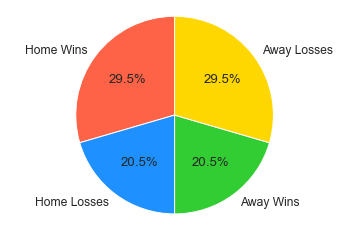

In [138]:
# Pie chart data
labels = ['Home Wins', 'Home Losses', 'Away Wins', 'Away Losses']
sizes = [home_wins, home_losses, away_wins, away_losses]
colors = ['#FF6347', '#1E90FF', '#32CD32', '#FFD700']

# Plot pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Display the pie chart
plt.show()

In [139]:
season_group = final_merged_data.groupby('season_id')
win_rate_per_season = season_group['wl_home'].apply(lambda x: (x == 'W').sum() / x.count())

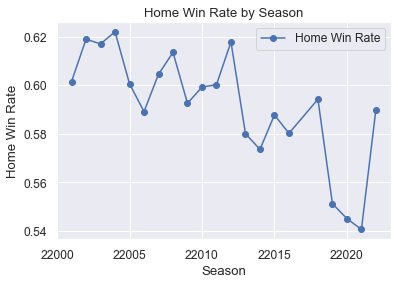

In [140]:
fig, ax = plt.subplots()

# Plot a line chart
ax.plot(win_rate_per_season.index, win_rate_per_season, marker='o', linestyle='-', label='Home Win Rate')

# Plot an area chart (uncomment the following line to use an area chart)
# ax.fill_between(win_rate_per_season.index, win_rate_per_season, color='skyblue', alpha=0.5, label='Home Win Rate')

# Customize the chart
ax.set_xlabel('Season')
ax.set_ylabel('Home Win Rate')
ax.set_title('Home Win Rate by Season')
ax.legend()

# Display the chart
plt.show()

In [141]:
# calculate win # of each team
home_wins = final_merged_data[final_merged_data['wl_home'] == 'W'].groupby('team_id_home')['wl_home'].count().reset_index()
home_wins.columns = ['team_id', 'home_wins']

# calculate home match for each number
home_games = final_merged_data.groupby('team_id_home')['wl_home'].count().reset_index()
home_games.columns = ['team_id', 'home_games']

# home advantege calculated
home_advantage = pd.merge(home_wins, home_games, on='team_id')
home_advantage['home_win_rate'] = home_advantage['home_wins'] / home_advantage['home_games']

# merge 
team_home_advantage = pd.merge(team_df, home_advantage, left_on='id', right_on='team_id')

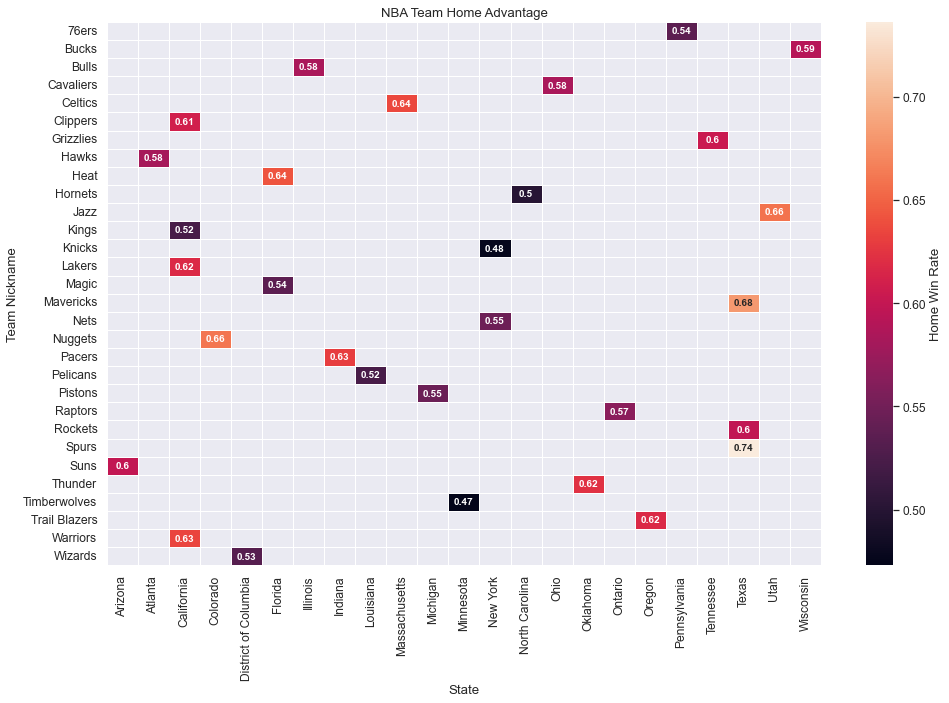

In [142]:
# Prepare the data for the heatmap
team_home_advantage_pivot = team_home_advantage.pivot(
    index="nickname",
    columns="state",
    values="home_win_rate"
)

# Create the heatmap
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.1)  # Adjust font size
heatmap = sns.heatmap(
    team_home_advantage_pivot,
    annot=True,
    linewidths=0.5,
    cbar_kws={"label": "Home Win Rate"},
    annot_kws={"fontsize": 10, "fontweight": "bold"}
)

# Add gridlines
heatmap.set_xticks([x + 0.5 for x in range(len(team_home_advantage_pivot.columns))], minor=True)
heatmap.set_yticks([y + 0.5 for y in range(len(team_home_advantage_pivot.index))], minor=True)
heatmap.xaxis.set_ticks_position('none') 
heatmap.yaxis.set_ticks_position('none') 
heatmap.grid(which='minor', color='black', linewidth=1)

plt.title("NBA Team Home Advantage")
plt.xlabel("State")
plt.ylabel("Team Nickname")
plt.show()

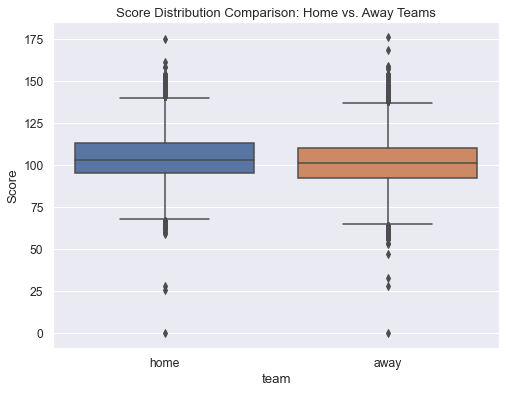

In [143]:
score_data = pd.DataFrame({
    "team": ["home"] * len(final_merged_data) + ["away"] * len(final_merged_data),
    "score": final_merged_data["pts_home"].tolist() + final_merged_data["pts_away"].tolist()
})

plt.figure(figsize=(8, 6))
sns.boxplot(x="team", y="score", data=score_data)
plt.title("Score Distribution Comparison: Home vs. Away Teams")
plt.ylabel("Score")
plt.show()

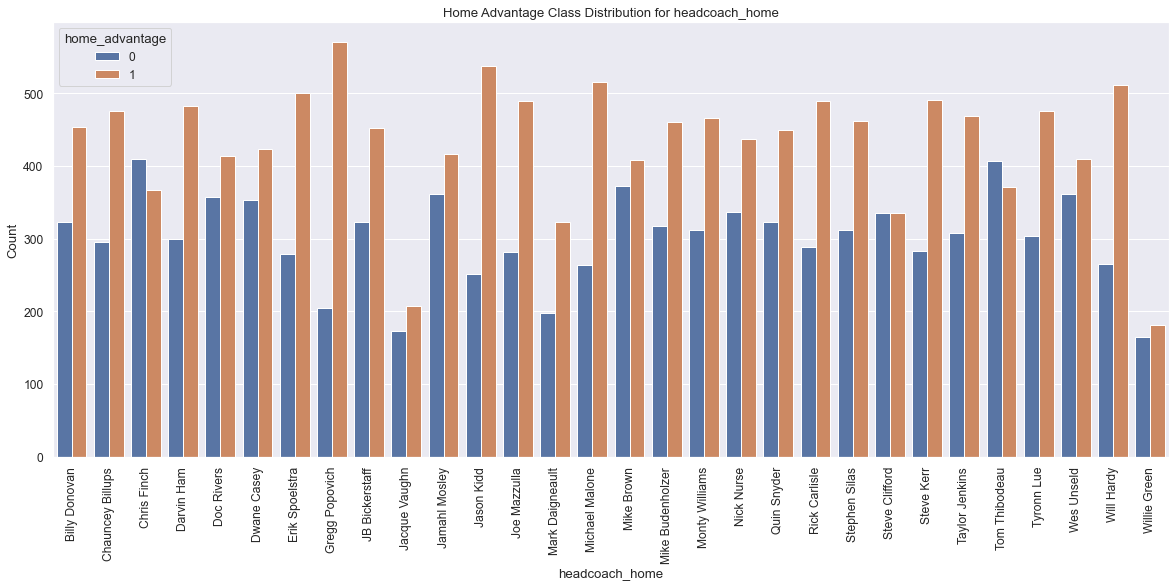

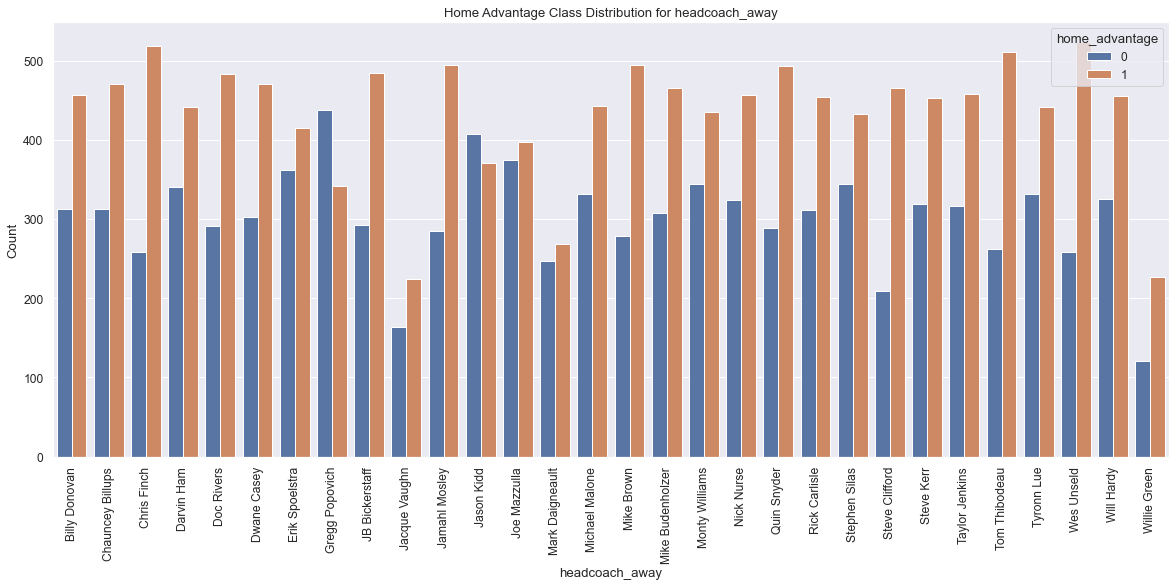

In [144]:
# Identify 'headcoach_home', 'headcoach_away'
categorical_columns = ['headcoach_home', 'headcoach_away']

# Loop through each categorical feature and create side-by-side bar plots
for col in categorical_columns:
    grouped_data = final_merged_data.groupby([col, 'home_advantage']).size().reset_index(name='count')
    
    plt.figure(figsize=(20, 8))
    sns.barplot(x=col, y='count', hue='home_advantage', data=grouped_data)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Home Advantage Class Distribution for {col}')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.show()

In [145]:
# Create a copy of the dataframe to avoid modifying the original dataframe
encoded_data = final_merged_data.copy()

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the selected columns
encoded_columns = encoder.fit_transform(encoded_data[['headcoach_home', 'headcoach_away']])

# Assign the encoded columns back to the dataframe
encoded_data[['headcoach_home', 'headcoach_away']] = encoded_columns

In [158]:
encoded_data.keys()

Index(['days_off_home', 'days_off_away', 'attend_density', 'game_id',
       'game_date', 'attendance', 'game_time', 'season_id', 'team_id_home',
       'team_abbreviation_home',
       ...
       'arena_away', 'arenacapacity_away', 'owner_away', 'generalmanager_away',
       'headcoach_away', 'dleagueaffiliation_away', 'facebook_away',
       'instagram_away', 'twitter_away', 'home_advantage'],
      dtype='object', length=103)

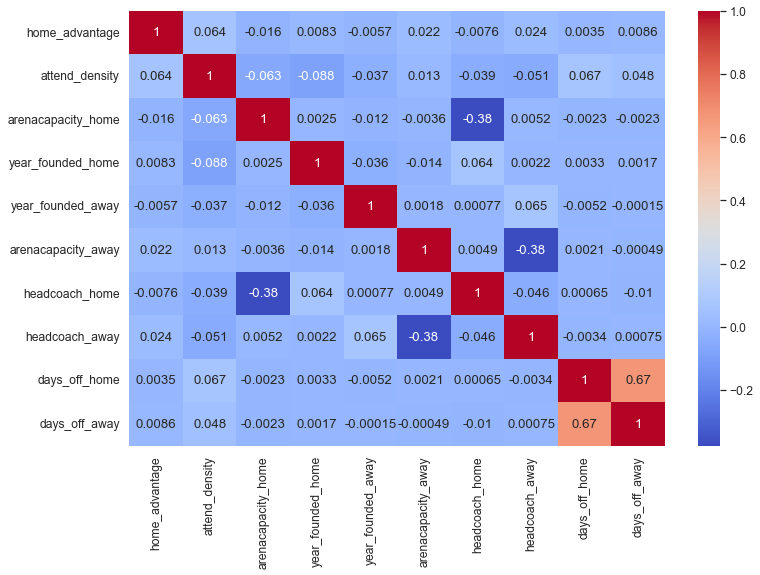

In [157]:
factors = encoded_data[['home_advantage', 'attend_density', 'arenacapacity_home', 'year_founded_home', 'year_founded_away', 'arenacapacity_away', 'headcoach_home', 'headcoach_away', 'days_off_home', 'days_off_away', 'timezone']]
correlations = factors.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.show()